In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
sys.path.append('../common')
from commonfunctions import visualize_dendrogram, visualize_cluster_data

In [3]:
# Read the dataset
dataset = pd.read_csv('../Data/cluster1.csv')
dataset.head(10)

,#,x,y
0,1,9.826856,10.726964
1,2,9.614675,10.979804
2,3,5.695524,13.625968
3,4,7.250205,11.891137
4,5,8.197534,11.667606
5,6,9.541818,10.135961
6,7,6.370988,11.910416
7,8,9.774527,11.281547
8,9,6.245188,10.728620
9,10,7.405066,12.376714


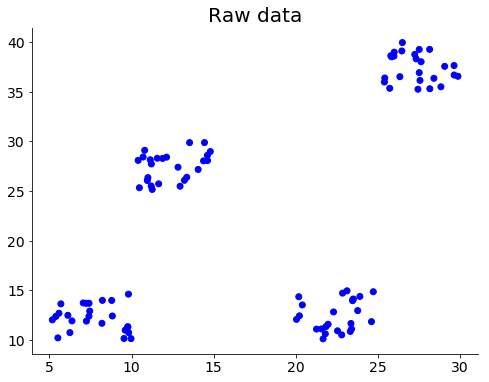

In [4]:
# Select dataset if required
X = dataset.iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')

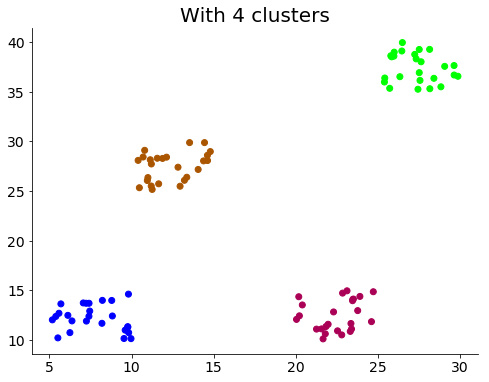

In [5]:
# Perform spectral clustering
from sklearn.cluster import SpectralClustering
estimator = SpectralClustering(n_clusters = 4, affinity='rbf')
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With 4 clusters', filename='file1default')
np.savetxt("affinity2.csv", estimator.affinity_matrix_, delimiter=",")

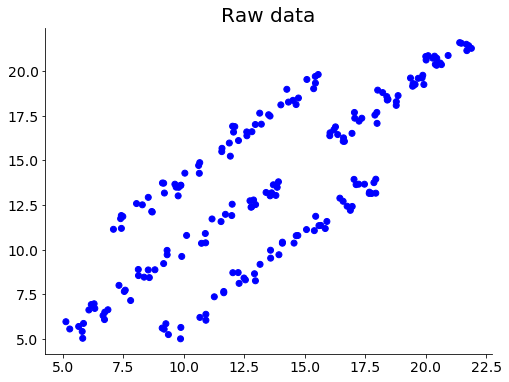

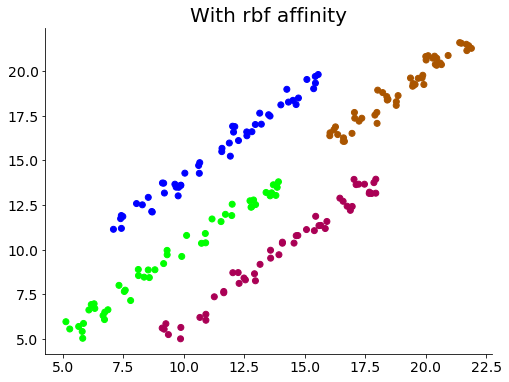

In [6]:
X = pd.read_csv('../Data/cluster3.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')
estimator = SpectralClustering(n_clusters = 4)
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With rbf affinity', filename='file3deafult')

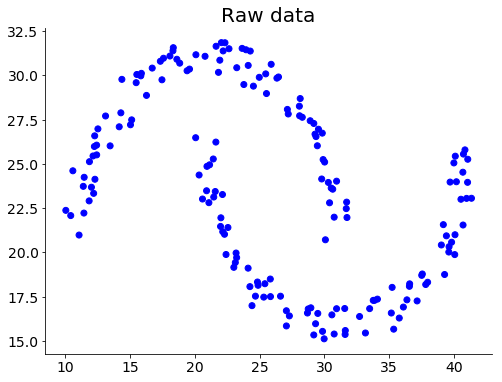

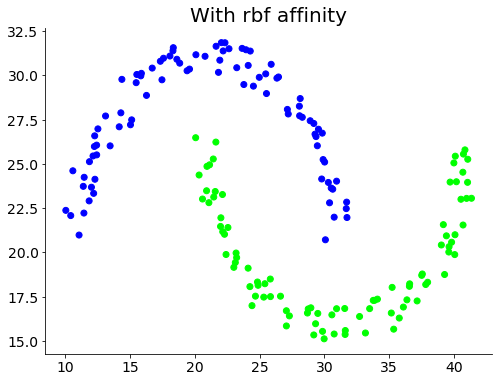

In [7]:
X = pd.read_csv('../Data/cluster4.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')
estimator = SpectralClustering(n_clusters = 2)
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With rbf affinity', filename='file4default')

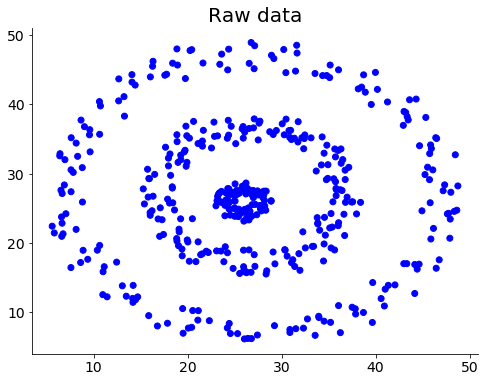

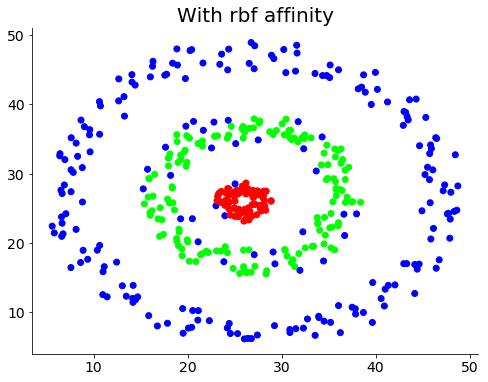

In [8]:
X = pd.read_csv('../Data/cluster5.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')
estimator = SpectralClustering(n_clusters = 3)
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With rbf affinity', filename='file5deafult')

The clusters are able to separate the data points in each ring. However, the separation is not clean. To fix this, we use the parameter gamma

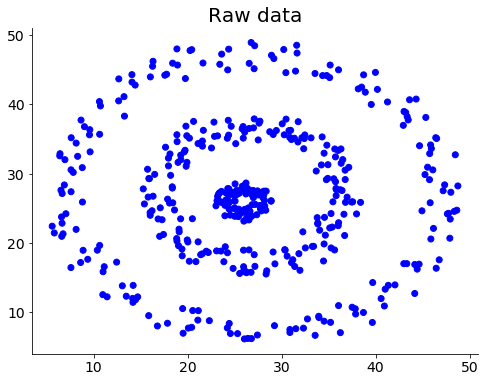

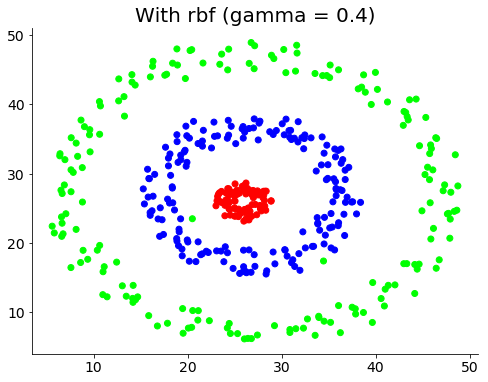

In [9]:
X = pd.read_csv('../Data/cluster5.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')
estimator = SpectralClustering(n_clusters = 3, gamma = 0.4)
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With rbf (gamma = 0.4)', filename='file5gammalow')

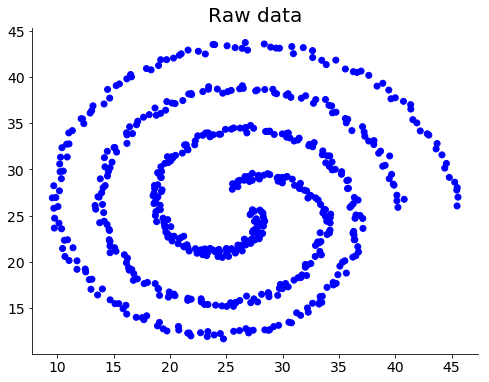

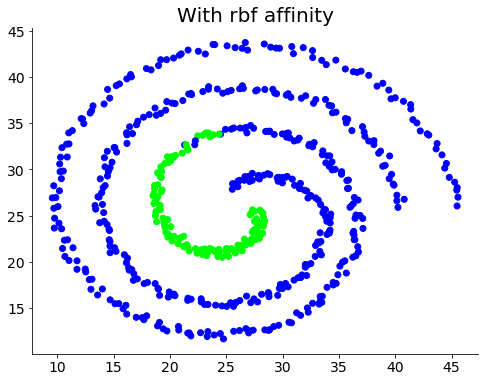

In [10]:
X = pd.read_csv('../Data/cluster6.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')
estimator = SpectralClustering(n_clusters = 2 )
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With rbf affinity', filename='file6deafult')

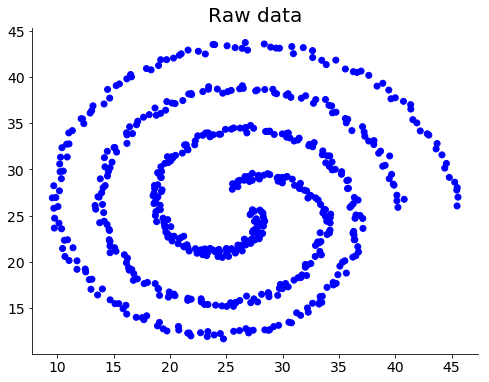

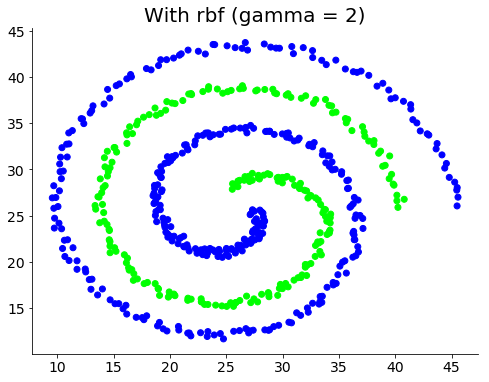

In [11]:
X = pd.read_csv('../Data/cluster6.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')
estimator = SpectralClustering(n_clusters = 2, gamma = 2 )
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With rbf (gamma = 2)', filename='file6gammahigh')

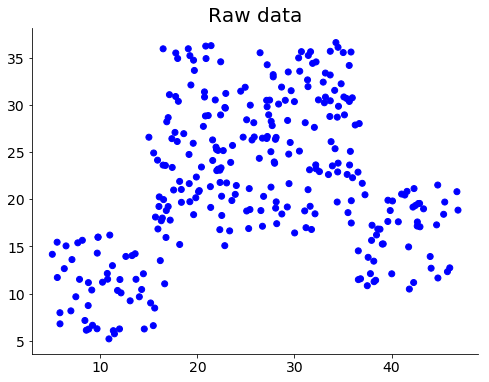

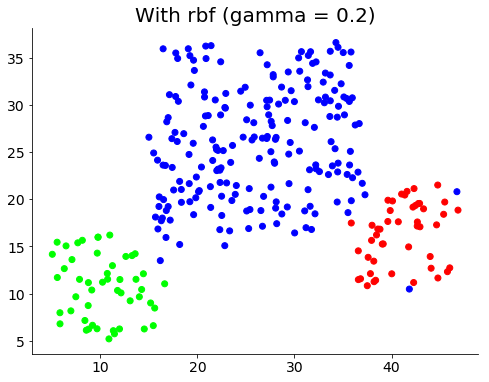

In [12]:
X = pd.read_csv('../Data/cluster2.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')
estimator = SpectralClustering(n_clusters = 3, gamma = 0.2)
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With rbf (gamma = 0.2)', filename='file2gammalow')

## Run the code below to get a general idea of different kernels and their similarity effect

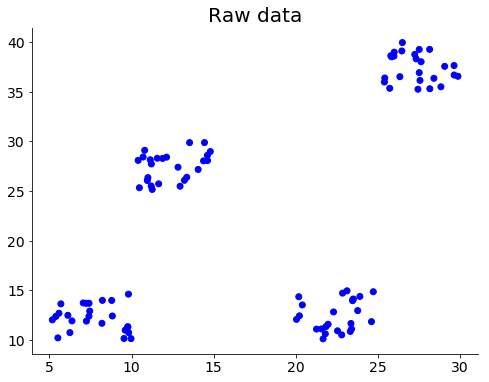

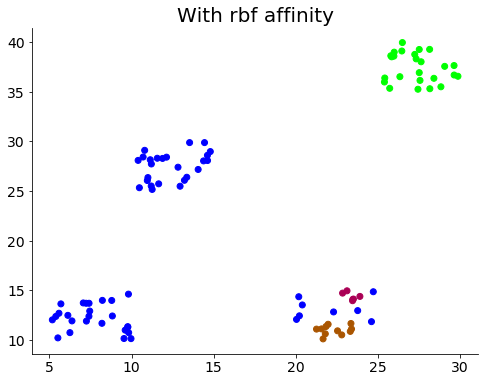

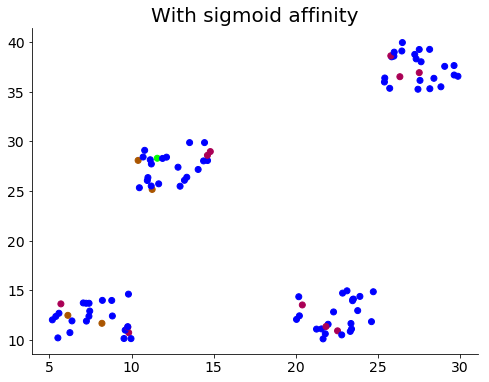

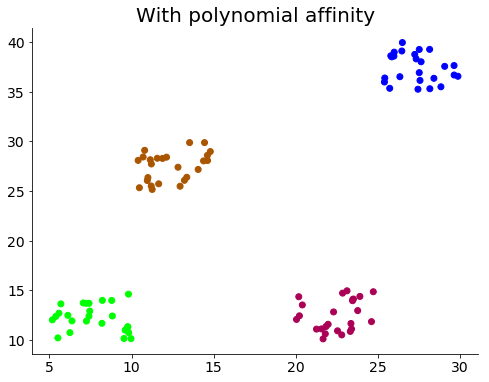

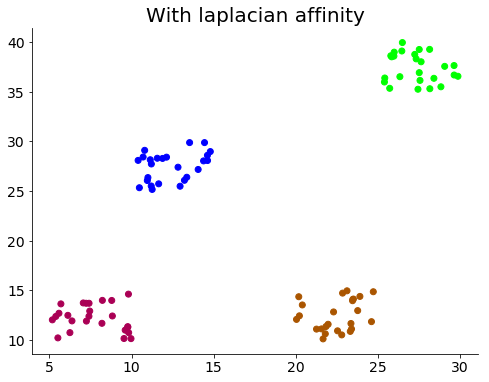

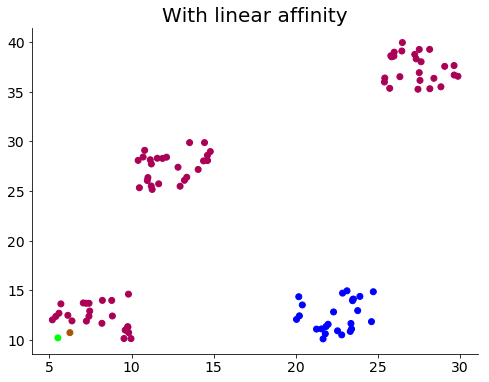

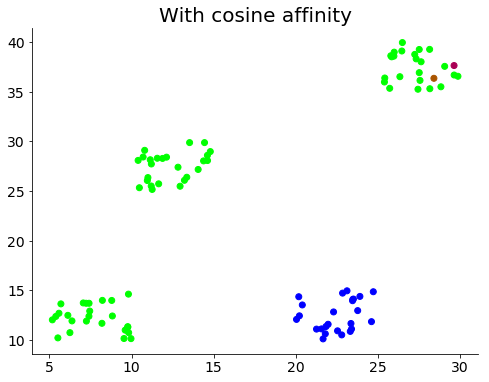

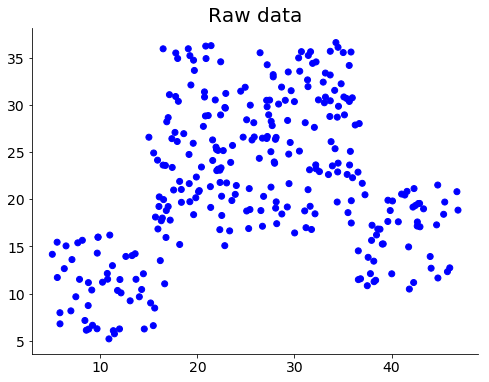

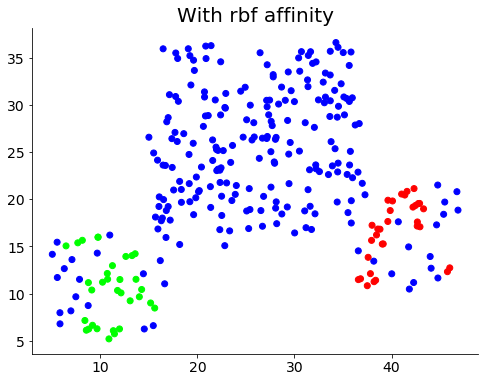

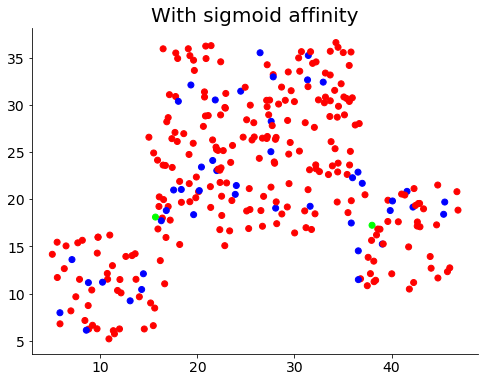

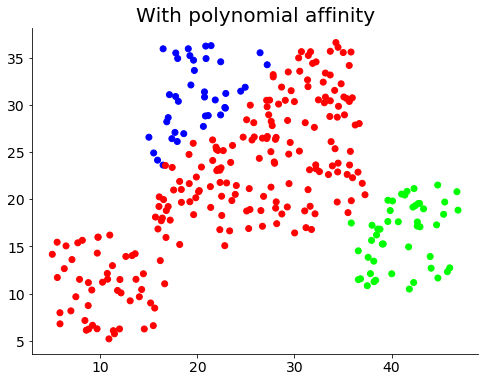

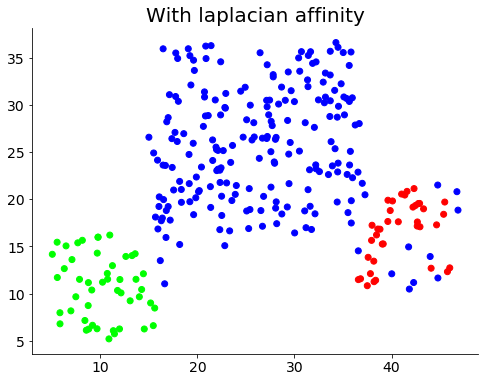

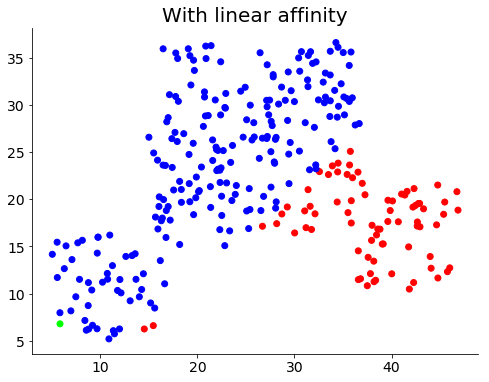

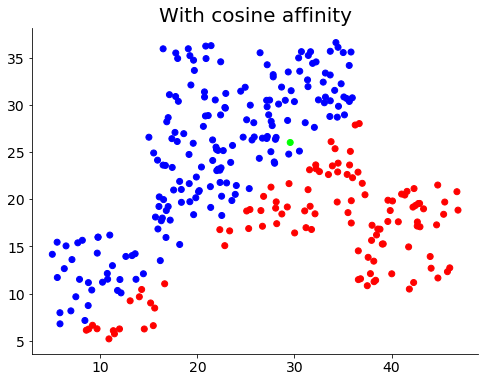

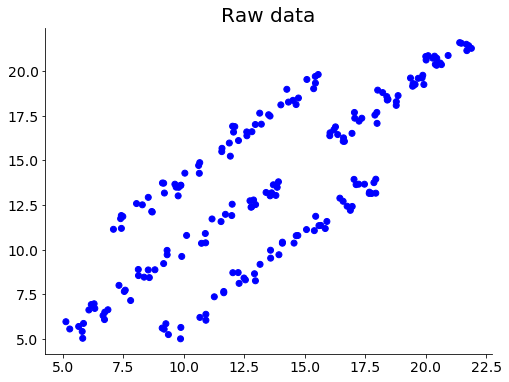

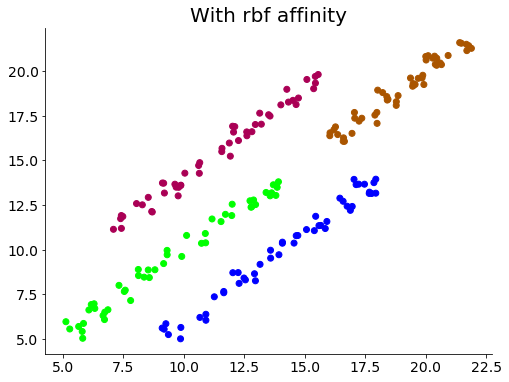

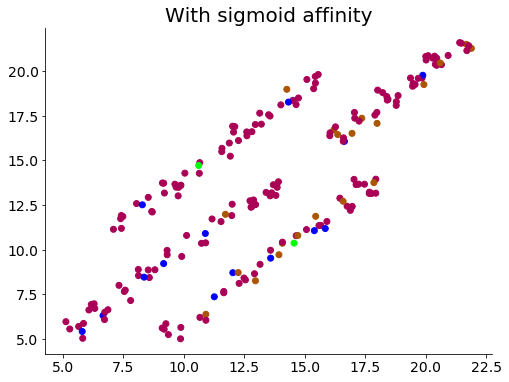

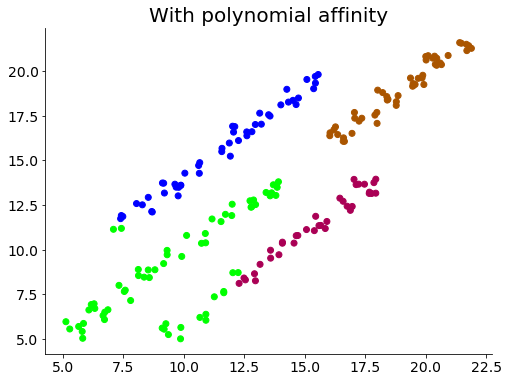

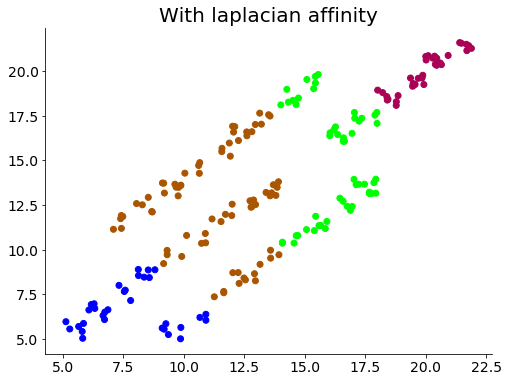

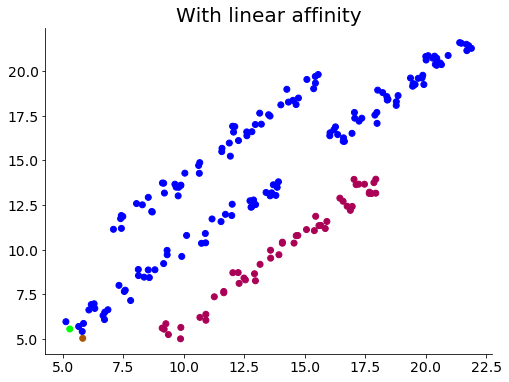

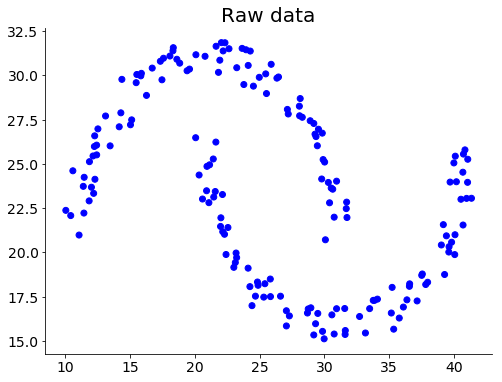

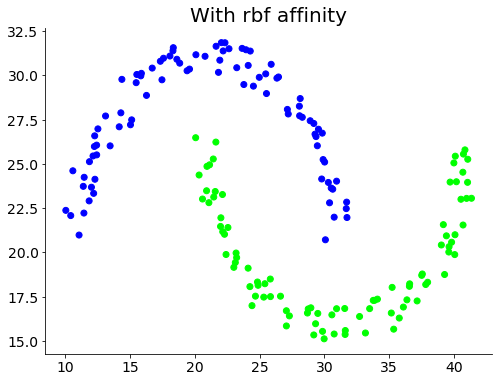

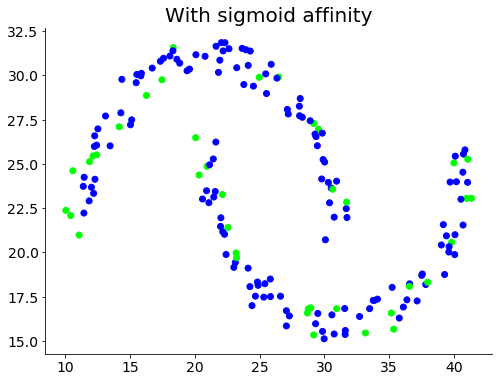

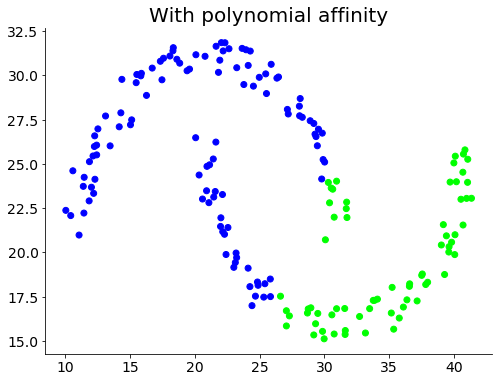

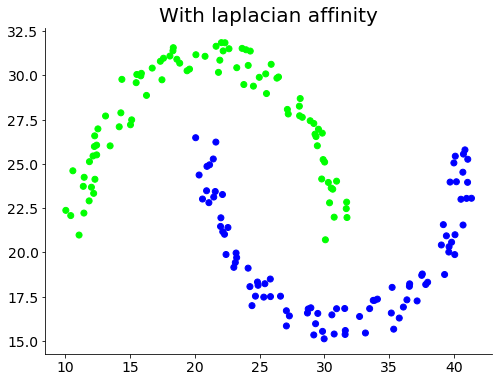

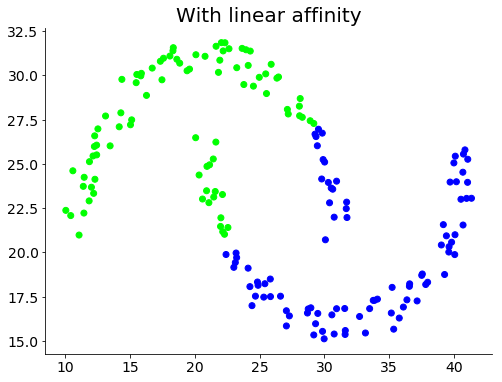

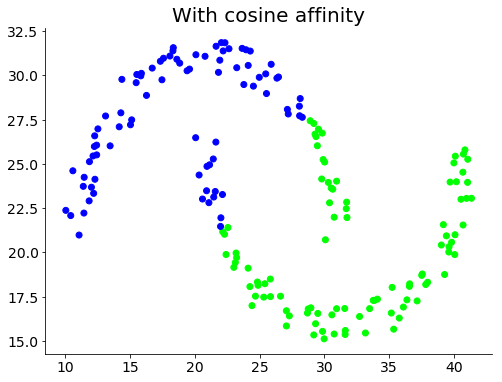

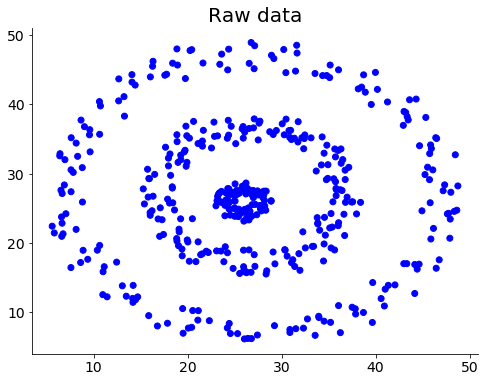

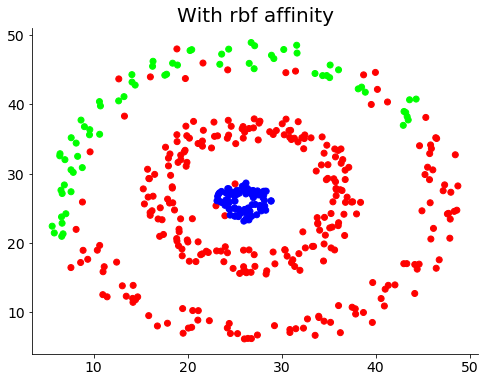

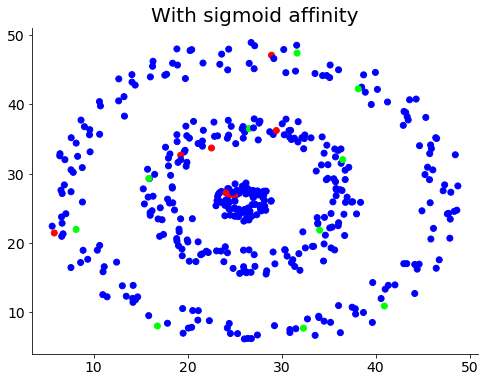

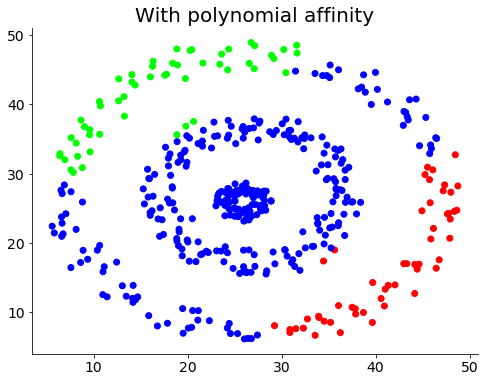

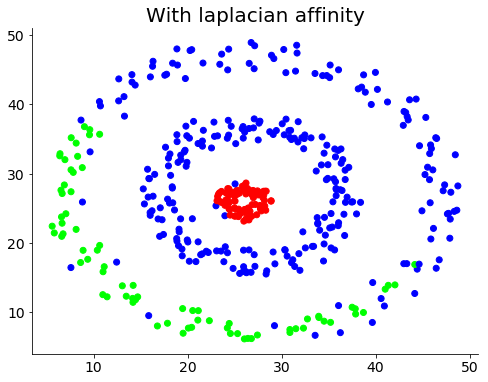

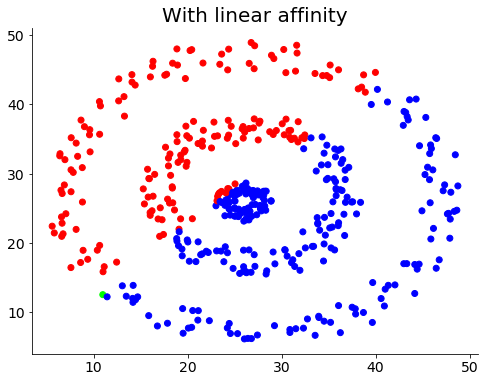

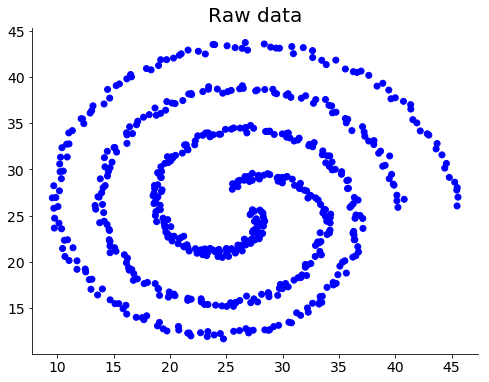

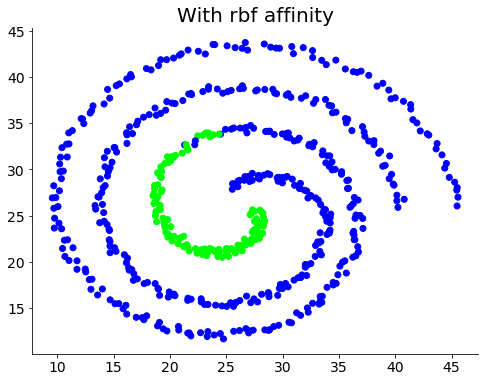

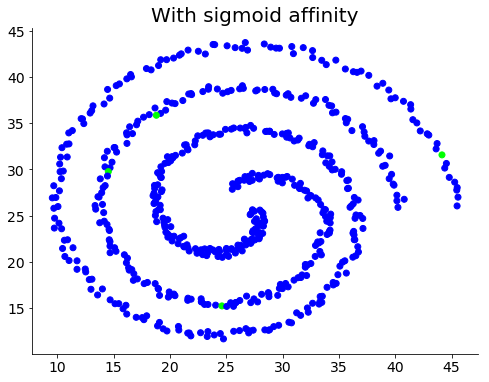

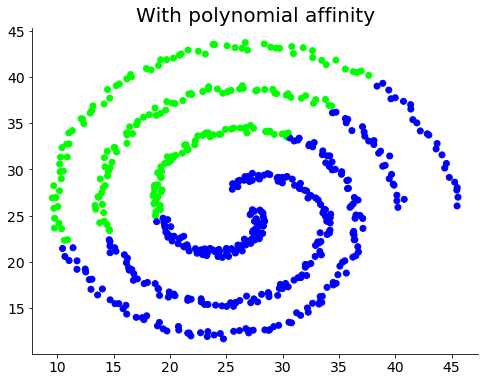

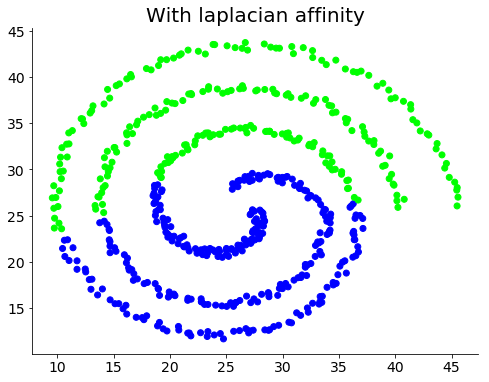

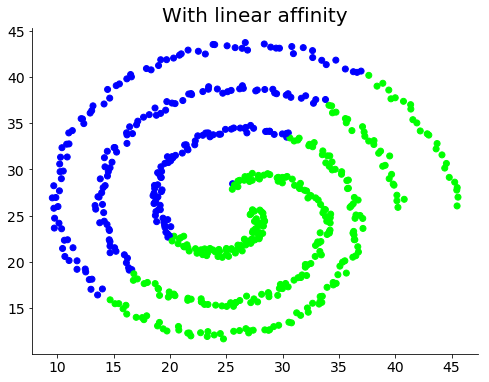

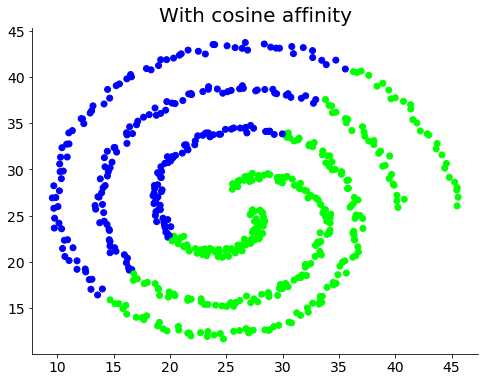

In [13]:
# Check for all data points

kernel_list = ['rbf', 'sigmoid', 'polynomial', 'laplacian', 'linear', 'cosine']
cluster_list = [4, 3, 4, 2, 3, 2]

for source in range(1,7):
    X = pd.read_csv('../Data/cluster'+(str)(source)+'.csv').iloc[:, [1,2]].values
    clusters = [2] * X.shape[0]
    visualize_cluster_data(plt, X, clusters, 'Raw data')
    
    for kernel in kernel_list:      
        # Facing some issue with cosine similarity. This is very likely due to less data points.
        # TODO: Change the datasets to include more data points later and try again
        if (kernel == 'cosine' and (source == 3 or source==5)): 
            break
        estimator = SpectralClustering(n_clusters = cluster_list[source-1], affinity = kernel)
        estimator.fit(X)
        visualize_cluster_data(plt, X, estimator.labels_, 'With ' + kernel + ' affinity', filename='file' + (str)(source) + kernel)